In [68]:
# Machine Learning Models
"""
Compare models using barplots
Accuracy score algorithm
1. Logistic regression
2. KNN -K nearest neighbor
3. SVM - Support Vector Machines
4. Naive Bayes - Gaussian Naive Bayes
5. Decision Tree
6. Random Forest
5. Confusion Matrix 
"""

'\nCompare models using barplots\nAccuracy score algorithm\n1. Logistic regression\n2. KNN -K nearest neighbor\n3. SVM - Support Vector Machines\n4. Naive Bayes - Gaussian Naive Bayes\n5. Decision Tree\n6. Random Forest\n5. Confusion Matrix \n'

In [69]:
# import Libraries
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file(pd.read_csv)
import matplotlib.pyplot as plt # plotting / data visualisation
import seaborn as sns #statistical data visualisation
%matplotlib inline

# ML for regression
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

# control display
pd.options.display.max_columns = 50
sns.set(style="darkgrid", rc={'axes.facecolor': '#DCDCDC'})

# ignore warnings
import warnings
warnings.filterwarnings('ignore')

In [70]:
# load / read the dataset
df = pd.read_csv('C:/Users/USER/RECESS/datasets/heart_disease.csv')
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [71]:
"""Columns
cp = chest pain
trestbps = resting blodd pressure
fbs = fasting blood sugar
restecg = resting electrocardiography
exang = exercise induced agina
slope = the slope of the peak exercise
oldpeak = ST depression induced
ca = number of major blood vessel
thal = normal, fexied defect, reversible defect
target = have a disease or not (1=yes, 0=no)

"""

'Columns\ncp = chest pain\ntrestbps = resting blodd pressure\nfbs = fasting blood sugar\nrestecg = resting electrocardiography\nexang = exercise induced agina\nslope = the slope of the peak exercise\noldpeak = ST depression induced\nca = number of major blood vessel\nthal = normal, fexied defect, reversible defect\ntarget = have a disease or not (1=yes, 0=no)\n\n'

In [72]:
# logistic Regression
# predict one or more possible outcomes (ususally presented as 1 or 0)
# column targets
df.target.value_counts()


1    526
0    499
Name: target, dtype: int64

In [73]:
# get the mean for training data
df.groupby('target').mean()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
target,,,,,,,,,,,,,
0,56.569138,0.827655,0.482966,134.106212,251.292585,0.164329,0.456914,139.130261,0.549098,1.600200,1.166333,1.158317,2.539078
1,52.408745,0.570342,1.378327,129.245247,240.979087,0.134981,0.598859,158.585551,0.134981,0.569962,1.593156,0.370722,2.119772


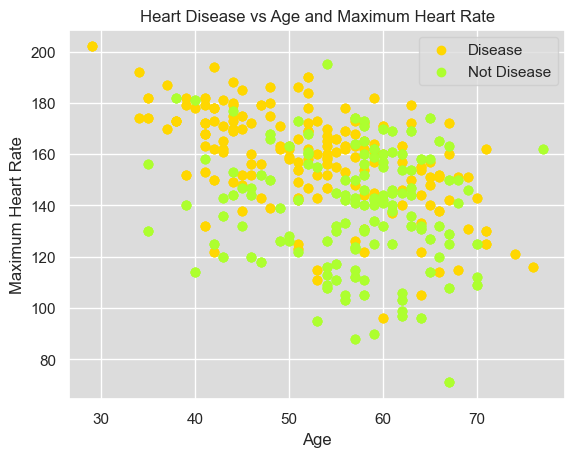

In [74]:
# create a scatter plot for Heart disease vs Age and Maximum Heart Rate
plt.scatter(x=df.age[df.target == 1], y=df.thalach[df.target == 1], c='#FFD700', label='Disease')
plt.scatter(x=df.age[df.target == 0], y=df.thalach[df.target == 0], c='#ADFF2F', label='Not Disease')

# add a legend
plt.legend()
# add labels to the axes
plt.xlabel('Age')
plt.ylabel('Maximum Heart Rate')

# set the title of the plot
plt.title('Heart Disease vs Age and Maximum Heart Rate')

# show the plot
plt.show()


In [75]:
# create a logistic regression
# help to solve problems with classification
# create the independent variables and dependent variables

y = df.target.values
x_data = df.drop(['target'], axis = 1)

In [76]:
# normalize the data
x=(x_data * np.min(x_data)) / (np.max(x_data)) * np.min(x_data)

In [77]:
# split the data for 80% for training and 20% for testing
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=0)

In [78]:
# Transpose matrices
x_train = x_train.T
y_train = y_train.T
x_test = x_test.T
y_test = y_test.T

In [79]:
# get the accuracy logistic regression
# getting the test Accuracy
accuracies = {}
lr = LogisticRegression()
lr.fit(x_train.T, y_train.T)
acc = lr.score(x_test.T, y_test.T) * 100

accuracies['LogisticRegression'] = acc

# get Output
print('Test Accuracy {:.2f}%'.format(acc))

Test Accuracy 74.63%


In [80]:
# First import the K-Nearest Neighbors (KNN) Classifier
# Get accuracy score of the K-Nearest Neighbors algorithm
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors = 2) # n_neighbous means k
knn.fit(x_train.T, y_train.T)
prediction = knn.predict(x_test.T)

# get output display
print("{} NN score: {:.2f}%".format(2, knn.score(x_test.T, y_test.T) * 100))


2 NN score: 94.15%


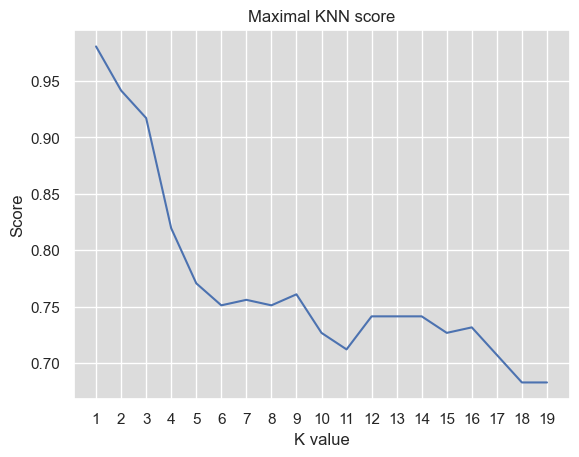

Maximum KNN score is 98.05


In [81]:
# get maximum KNN score for the model
score_list = []
for i in range(1, 20):
    knn2 = KNeighborsClassifier(n_neighbors = i) # get n_neighbours means k
    knn2.fit(x_train.T, y_train.T)
    score_list.append(knn2.score(x_test.T, y_test.T))

# show using line plot
plt.plot(range(1,20), score_list)
plt.xticks(np.arange(1,20,1))
plt.xlabel('K value')
plt.ylabel('Score')
plt.title('Maximal KNN score')
plt.show()

#get maximum KNN score for the model in percentage
acc = max(score_list) * 100
accuracies['KNN'] = acc
print('Maximum KNN score is {:.2f}'.format(acc))

In [82]:
# get Test accuracy using the Support Vector Machine (SVM) algorithm
from sklearn.svm import SVC

svm = SVC(random_state = 1)
svm.fit(x_train.T, y_train.T)

acc = svm.score(x_train.T, y_train.T) * 100
accuracies['SVM'] = acc
print('Test Accuracy of SVM Algorithm: {:.2f}%'.format(acc))

Test Accuracy of SVM Algorithm: 67.93%


In [83]:
# get accuracy using the Naive Bayes Algorithm
from sklearn.naive_bayes import GaussianNB

nb = GaussianNB()
nb.fit(x_train.T, y_train.T)

acc = nb.score(x_test.T, y_test.T) * 100
accuracies['Naive Bayes'] = acc
print('Accuracy of Naive Bayes: {:.2f}%'.format(acc))

Accuracy of Naive Bayes: 75.12%


In [84]:
# get accuracy using decision tree model
from sklearn.tree import DecisionTreeClassifier

dtc = DecisionTreeClassifier()
dtc.fit(x_train.T, y_train.T)

acc = dtc.score(x_test.T, y_test.T) * 100
accuracies['Decision Tree'] = acc
print('Decision Tree Test Accuracy {:.2f}%'.format(acc))

Decision Tree Test Accuracy 98.05%


In [85]:
# get accuracy of Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators = 1000, random_state= 1)
rf.fit(x_train.T, y_train.T)

acc = rf.score(x_test.T, y_test.T) *100
accuracies['Random Forest'] = acc

print('Random Forest Algorithm Accuracy Score: {:.2f}'.format(acc))

Random Forest Algorithm Accuracy Score: 100.00


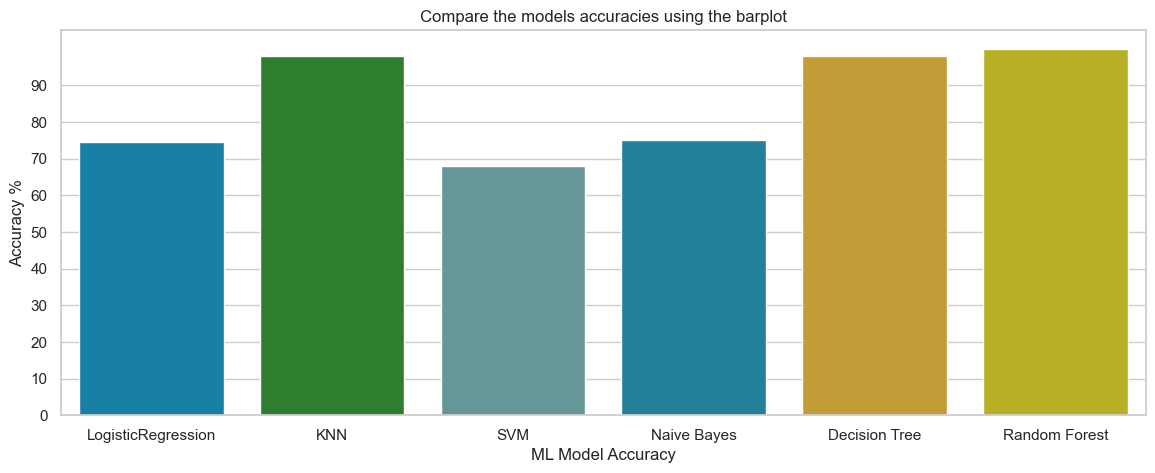

In [86]:
# compare the models accuracies using the barplot from sns
colors = ['#008BBB', '#228B22', '#5F9EA0', '#0F8BAE', '#DAA520', '#CFC60E']

sns.set_style('whitegrid')
plt.figure(figsize=(14, 5))
plt.yticks(np.arange(0, 100, 10))
plt.title('Compare the models accuracies using the barplot')
plt.ylabel('Accuracy %')
plt.xlabel('ML Model Accuracy')
sns.barplot(x=list(accuracies.keys()), y=list(accuracies.values()), palette=colors)
plt.show()

In [87]:
# ML Confusion matrix
# evaluate the performance of a classification model
"""
True Positive (TP):The number of instances correctly predicted as positive (correctly classified as the posititve class)
Treu Negative (TN): The number of instances correctlt predicted as negative (correctly classified as the negative class)
False Positive (FP): The number of instances incorrectly predicted as  psitive( incorrectly classified as positive class)
False Negative (FN): The number of instances incorrectly predicted as negative (incorrectly classified as the negative class)
ROC Curve and AUC : ROC (Receiver Operating Characteristics) AUC (Area Under the curve)
"""

'\nTrue Positive (TP):The number of instances correctly predicted as positive (correctly classified as the posititve class)\nTreu Negative (TN): The number of instances correctlt predicted as negative (correctly classified as the negative class)\nFalse Positive (FP): The number of instances incorrectly predicted as  psitive( incorrectly classified as positive class)\nFalse Negative (FN): The number of instances incorrectly predicted as negative (incorrectly classified as the negative class)\nROC Curve and AUC : ROC (Receiver Operating Characteristics) AUC (Area Under the curve)\n'

In [88]:
# get confusion matrices to look at the imbalance dataset
# predicted values
y_head_lr = lr.predict(x_test.T)
knn3 = KNeighborsClassifier(n_neighbors = 3)
knn3.fit(x_train.T, y_train.T)
y_head_knn = knn3.predict(x_test.T)
y_head_svm = svm.predict(x_test.T)
y_head_nb = nb.predict(x_test.T)
y_head_dtc = dtc.predict(x_test.T)
y_head_rf = rf.predict(x_test.T)

In [89]:
# import module for confusion matrix
from sklearn.metrics import confusion_matrix

cm_lr = confusion_matrix(y_test, y_head_lr)
cm_knn = confusion_matrix(y_test, y_head_knn)
cm_svm = confusion_matrix(y_test, y_head_svm)
cm_nb = confusion_matrix(y_test, y_head_nb)
cm_dtc = confusion_matrix(y_test, y_head_dtc)
cm_rf = confusion_matrix(y_test, y_head_rf)

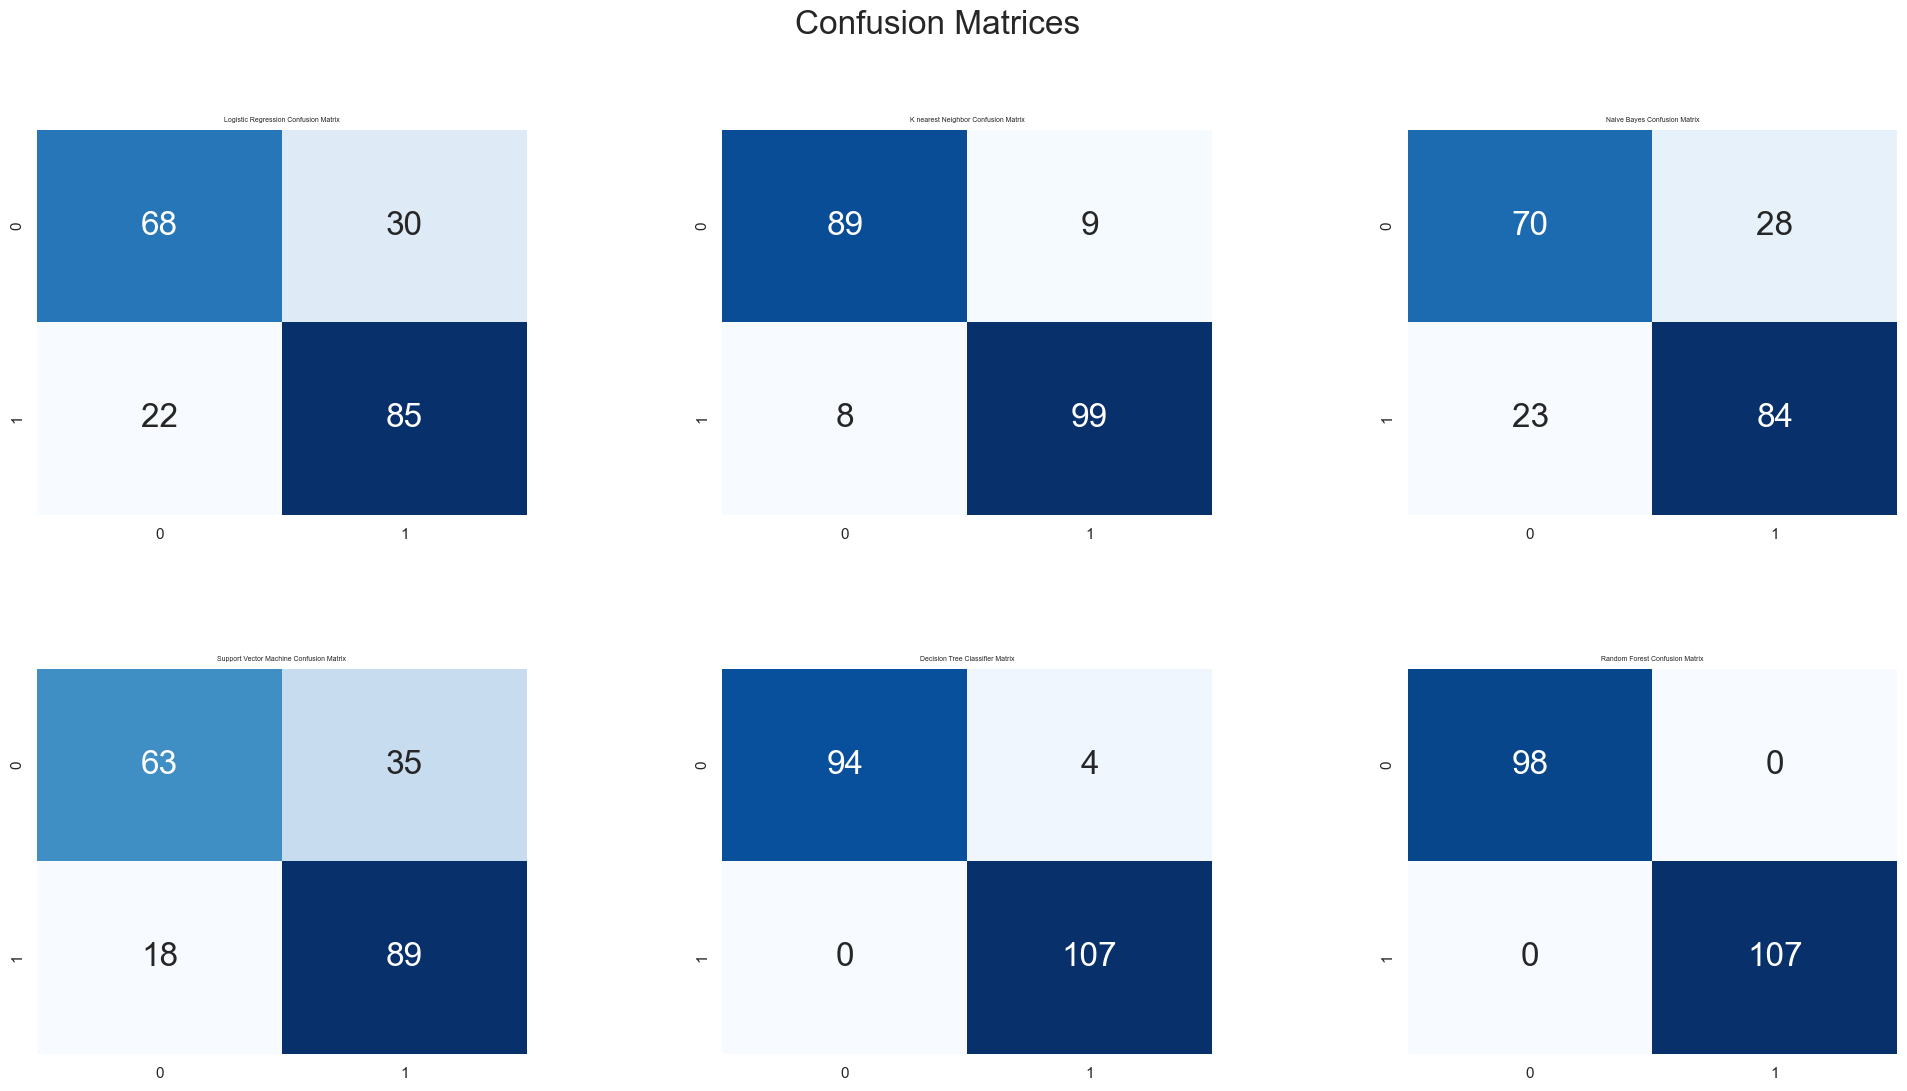

In [90]:
# plot confusion matrices using heatmap
plt.figure(figsize=(24,12))

plt.suptitle('Confusion Matrices', fontsize= 24)
plt.subplots_adjust(wspace = 0.4, hspace = 0.4)

#Heatmap for 'Logistic regression confusion matrix'  
plt.subplot(2,3,1)
plt.title('Logistic Regression Confusion Matrix', fontsize = 5)
sns.heatmap(cm_lr, annot = True, cmap='Blues', fmt='d', cbar=False, annot_kws={'size': 24})

#Heatmap for 'K Nearest Neighbor confusion matrix'  
plt.subplot(2,3,2)
plt.title('K nearest Neighbor Confusion Matrix', fontsize = 5)
sns.heatmap(cm_knn, annot = True, cmap='Blues', fmt='d', cbar=False, annot_kws={'size': 24})

#Heatmap for 'Naive Bayes confusion matrix'  
plt.subplot(2,3,3)
plt.title('Naive Bayes Confusion Matrix', fontsize = 5)
sns.heatmap(cm_nb, annot = True, cmap='Blues', fmt='d', cbar=False, annot_kws={'size': 24})

#Heatmap for Support Vector Machine confusion matrix'  
plt.subplot(2,3,4)
plt.title('Support Vector Machine Confusion Matrix', fontsize = 5)
sns.heatmap(cm_svm, annot = True, cmap='Blues', fmt='d', cbar=False, annot_kws={'size': 24})

#Heatmap for 'Decision Tree Classifier confusion matrix'  
plt.subplot(2,3,5)
plt.title('Decision Tree Classifier Matrix', fontsize = 5)
sns.heatmap(cm_dtc, annot = True, cmap='Blues', fmt='d', cbar=False, annot_kws={'size': 24})

#Heatmap for 'Random Forest confusion matrix'  
plt.subplot(2,3,6)
plt.title('Random Forest Confusion Matrix', fontsize = 5)
sns.heatmap(cm_rf, annot = True, cmap='Blues', fmt='d', cbar=False, annot_kws={'size': 24})

plt.show()

In [91]:
"""
The confusion matrix allows us to understand how well the model
is performing and identify specific area of improvement,
especially when it comes to dealing with inbalanced datasets or
when different types of errots have different costs and consequences
"""

'\nThe confusion matrix allows us to understand how well the model\nis performing and identify specific area of improvement,\nespecially when it comes to dealing with inbalanced datasets or\nwhen different types of errots have different costs and consequences\n'